# Исследование рынка общественного питания
Определить:
* перспективный вид заведения
* выгодный район расположения
* оптимальное количество посадочных мест
* возможности развития

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#data.chain" data-toc-modified-id="data.chain-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>data.chain</a></span></li><li><span><a href="#data.object_name" data-toc-modified-id="data.object_name-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>data.object_name</a></span></li><li><span><a href="#data.address->-data.street_name" data-toc-modified-id="data.address->-data.street_name-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>data.address &gt; data.street_name</a></span></li><li><span><a href="#streets.district_id,-U" data-toc-modified-id="streets.district_id,-U-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>streets.district_id, U</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Виды" data-toc-modified-id="Виды-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Виды</a></span></li><li><span><a href="#Сетевые-и-несетевые" data-toc-modified-id="Сетевые-и-несетевые-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Сетевые и несетевые</a></span></li><li><span><a href="#Посадочные-места-в-сетевых" data-toc-modified-id="Посадочные-места-в-сетевых-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Посадочные места в сетевых</a></span></li><li><span><a href="#Посадочные-места-по-видам" data-toc-modified-id="Посадочные-места-по-видам-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Посадочные места по видам</a></span></li><li><span><a href="#Топ-10-улиц-по-количеству-общепитов" data-toc-modified-id="Топ-10-улиц-по-количеству-общепитов-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Топ-10 улиц по количеству общепитов</a></span></li><li><span><a href="#Улицы-с-1-общепитом" data-toc-modified-id="Улицы-с-1-общепитом-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Улицы с 1 общепитом</a></span></li><li><span><a href="#Посадочные-места-улицах-c-большим-количеством-заведений" data-toc-modified-id="Посадочные-места-улицах-c-большим-количеством-заведений-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Посадочные места улицах c большим количеством заведений</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from scipy import stats as st
from io import StringIO 
from plotly.subplots import make_subplots

import plotly
import re
import requests
import warnings 
import openpyxl

In [2]:
pd.set_option('chained_assignment', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# Рестораны
data = pd.read_csv('/datasets/rest_data.csv')

In [4]:
# Улицы с сайта
spreadsheet_id = '1v_7sT5sz66zxXdT9JlxCX2B_1-8TYjxSk8E4aMYDf5w'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
response = requests.get(file_name)
response = response.content.decode('utf-8')
streets = pd.read_csv(StringIO(response))

In [5]:
# Районы
spreadsheet_id = '1A3xFHevHtUz3Ycc01Bl6YvpOT0rL-gpX-RWudtb9cjo'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
response = requests.get(file_name)
response = response.content.decode('utf-8')
districts = pd.read_csv(StringIO(response), dtype={'district_id': 'str'})

In [6]:
data.name = 'data'
streets.name = 'streets'
districts.name = 'districts'

## Изучение данных

In [7]:
for df in (data, streets, districts):
    print(df.name)
    print('----------------------------------------')
    df.info() 
    print('\nКоличество повторяющихся строк в', df.name, '—', df.loc[:, df.columns != df.columns[0]].duplicated().sum())
    display(df.head())

data
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB

Количество повторяющихся строк в data — 82


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


streets
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5297 entries, 0 to 5296
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   street_id    5297 non-null   int64 
 1   street_name  5297 non-null   object
 2   district_id  5297 non-null   object
dtypes: int64(1), object(2)
memory usage: 124.3+ KB

Количество повторяющихся строк в streets — 208


,street_id,street_name,district_id
0,8880,1-й Ирининский переулок,0102
1,8890,2-й Ирининский переулок,0102
2,8891,3-й Ирининский переулок,0102
3,8910,Иркутская улица,0406
4,8920,1-й Иртышский проезд,0406


districts
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   district_id    158 non-null    object
 1   district_name  158 non-null    object
dtypes: object(2)
memory usage: 2.6+ KB

Количество повторяющихся строк в districts — 0


,district_id,district_name
0,0100,Центральный административный округ
1,0101,район Арбат
2,0102,Басманный район
3,0103,район Замоскворечье
4,0104,Красносельский район


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b>Вывод</b><br>
<li>пропусков не обнаружено</li>
<li>обнаружены дубликаты по значимым столбцам в таблицах <b>data</b> и <b>streets</b></li>
<li>заменить на сетевой/одиночный значения да/нет в поле <b>chain</b> таблицы <b>data</b></li>
<li>в поле <b>object_name</b> таблицы <b>data</b>: привести слова к нижнему регистру, убрать кавычки и виды заведений</li>
<li>вынести улицу в отдельный столбец из столбца <b>address</b> таблицы <b>data</b></li>
<li>добавить в таблицу <b>streets</b> строки с улицами, входящими в более, чем в 1 район</li>
<li>объединить таблицы <b>streets</b> и <b>districts</b></li>
</div>

## Предобработка данных

In [8]:
for df in (data, streets):
     df = df.drop_duplicates(df.columns[1:], keep = 'last')
     df = df.reset_index(drop=True)
     print(df.loc[:, df.columns != df.columns[0]].duplicated().sum())

0
0


### data.chain

In [9]:
data['chain'] = data['chain'].map({'да':'сетевой','нет':'одиночный'})

In [10]:
data['chain'].value_counts()

одиночный    12398
сетевой       2968
Name: chain, dtype: int64

In [11]:
12398+2968

15366

### data.object_name

In [12]:
data.object_name = data.object_name.str.lower().str.strip()

In [13]:
characters_to_remove = '«»!?()№'
pattern = '[' + characters_to_remove + ']'
data['object_name'] = data['object_name'].str.replace(pattern,'', regex='True')

In [14]:
stop_words =\
list(data[data['chain']=='сетевой'].groupby('chain')['object_type'].apply(set).reset_index(name='all_types')['all_types'][0])
original_string = data['object_name']
replacement =''
for pattern in stop_words:
    data['object_name']= data['object_name'].apply(lambda x: re.sub(pattern, replacement, x))

In [15]:
data.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,одиночный,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,одиночный,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,академия,одиночный,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,сетевой,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,вишневая метель,одиночный,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


### data.address > data.street_name

In [16]:
def get_address(data, new_column):
    address = data.address.str.split(',', expand=True)
    data[new_column] = np.nan
    for i in range(len(data)):
        if 'Москва' in address.loc[i,0]:
            data.loc[i, new_column]= address.loc[i,1]
        else:
            data.loc[i, new_column] = address.loc[i,0]   
    data[new_column] = data[new_column].apply(lambda x: x.strip())

In [17]:
get_address(data, 'street_name')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
 6   street_name  15366 non-null  object
dtypes: int64(2), object(5)
memory usage: 840.5+ KB


In [19]:
data.head()

,id,object_name,chain,object_type,address,number,street_name
0,151635,сметана,одиночный,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,одиночный,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,академия,одиночный,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,сетевой,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,вишневая метель,одиночный,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


### streets.district_id, U

In [20]:
streets.head()

,street_id,street_name,district_id
0,8880,1-й Ирининский переулок,0102
1,8890,2-й Ирининский переулок,0102
2,8891,3-й Ирининский переулок,0102
3,8910,Иркутская улица,0406
4,8920,1-й Иртышский проезд,0406


In [21]:
streets = streets.set_index(['street_id', 'street_name']).apply(lambda x: x.str.split(';').explode()).reset_index() 

In [22]:
streets['district_id'] = streets['district_id'].apply(lambda x: x.strip())

In [23]:
streets_districts = streets.merge(districts, on = 'district_id', how='left')

In [24]:
streets_districts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 0 to 5975
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   street_id      5976 non-null   int64 
 1   street_name    5976 non-null   object
 2   district_id    5976 non-null   object
 3   district_name  5976 non-null   object
dtypes: int64(1), object(3)
memory usage: 233.4+ KB


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b>Вывод</b><br>
<li> значения да/нет в поле <b>chain</b> таблицы <b>data</b> заменены на сетевой/одиночный для удобства построения графиков</li>
<li>удалены дубликаты из таблиц <b>data</b> и <b>streets</b></li>
<li>поле <b>object_name</b> таблицы <b>data</b> приведено к более-менее однотипному формату написания</li>
<li>улица вынесена в отдельный столбец <b>street_name</b>из столбца <b>address</b> таблицы <b>data</b></li>
<li>в таблицу <b>streets</b> добавлены дополнительные строки с улицами, входящими в более, чем в 1 район</li>
<li>таблицы <b>streets</b> и <b>districts</b> объединены.</li>
</div>

## Анализ данных

In [25]:
# Построение графиков
def draw_chart(data, kind, data_y=None, data_x=None, title=None, xlabel=None, ylabel = None
               , height=None, width=None
               , vmax=None, fmt=None, color = None, color_name=None):
        # Гистограмма
    if kind == 'hist':
        # Количество корзин
        def calc_bins (data, data_y):
            if data[data_y].max() < 20:
                return 100
            else: return 50
        # График
        calculated_bins = calc_bins(data, data_y)
        fig = px.histogram(data, x = data_y, nbins=calculated_bins)
    # Тепловая карта     
    elif kind == 'heatmap':
        sns.set(style='white')
        plt.figure(figsize=(13, 9))
        sns.heatmap(data, annot=True, linewidths=1, linecolor='gray', fmt=fmt).set_yticklabels(data.index.date)
    # Точечный
    elif kind == 'scatter':
        fig = px.scatter(data_frame =data, x = data_x, y=data_y)
    # Столбцовый
    elif kind == 'bar':
        fig = px.bar(data, x=data_x, y=data_y, color=color, labels={color:color_name}#, text=data_y
                    )
        #fig.layout.yaxis.showticklabels=False
    # Линейный
    elif kind == 'line':
        fig = px.line(data, x=data_x, y=data_y)
    # Бокс 
    elif kind == 'box':
        fig = px.box(data, x=data_x, y=data_y)
    if kind !='hist':
        fig.update_layout(
        height=height, width=width,
        title='<b>%s</b>'%(title), title_x=0.5, title_font_color = 'black',
        xaxis_title='%s'%(xlabel), xaxis_title_font_color = 'black',
        yaxis_title='%s'%(ylabel), yaxis_title_font_color = 'black',
        font=dict(family='Calibri, monospace', size=16, color='#7f7f7f'))
    else:
        fig.update_layout(
        title='<b>Распределение по %s</b>'%(data_y), title_x=0.5, title_font_color = 'black',
        xaxis_title='Значение', xaxis_title_font_color = 'black',
        yaxis_title='Частота', yaxis_title_font_color = 'black',
        font=dict(family='Calibri, monospace', size=16, color='#7f7f7f'))
    return fig

### Виды 
* по количеству, график

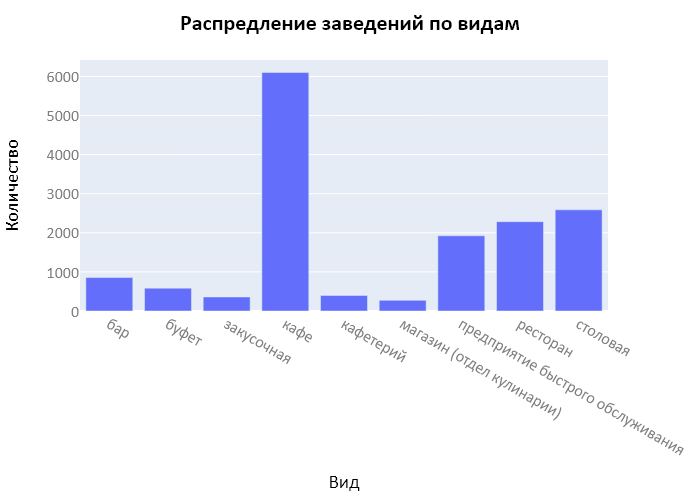

In [26]:
fig = draw_chart(data = data.groupby('object_type', as_index=False).agg({'id':'nunique'}).rename(columns={'id':'restaurants_cnt'})
           , kind='bar', data_x ='object_type', xlabel = 'Вид',  data_y='restaurants_cnt'
           , ylabel = 'Количество', title = 'Распредление заведений по видам')
fig.show('png')

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b>Вывод</b><br>
<li>больше всего в Москве распостранены кафе.</li>
<li>далее в порядке убывания распространённости идут столовые, рестораны и фастфуды.</li>
<li>реже всего встречаются кулинарии и закусочные.</li>
</div>

### Сетевые и несетевые
* по количеству, график
* виды, для которых характерно сетевое распространение

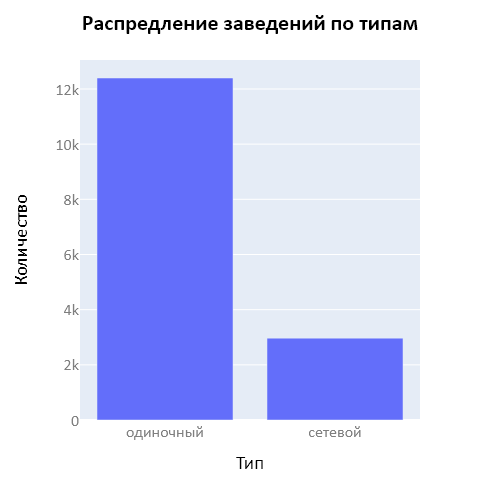

In [27]:
fig = draw_chart(data = data.groupby('chain', as_index=False).agg({'id':'nunique'}).rename(columns={'id':'restaurants_cnt'})
           , kind='bar', height =500, width=500, data_x ='chain', xlabel = 'Тип',  data_y='restaurants_cnt'           
           , ylabel = 'Количество', title = 'Распредление заведений по типам')
fig.show('png')

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b>Вывод</b><br>
<li>по большей части заведения общественного питания в Москве — одиночные</li>
<li>сетевых почти в 6 раз меньше.</li>
</div>

In [28]:
data['chain'].unique()

array(['одиночный', 'сетевой'], dtype=object)

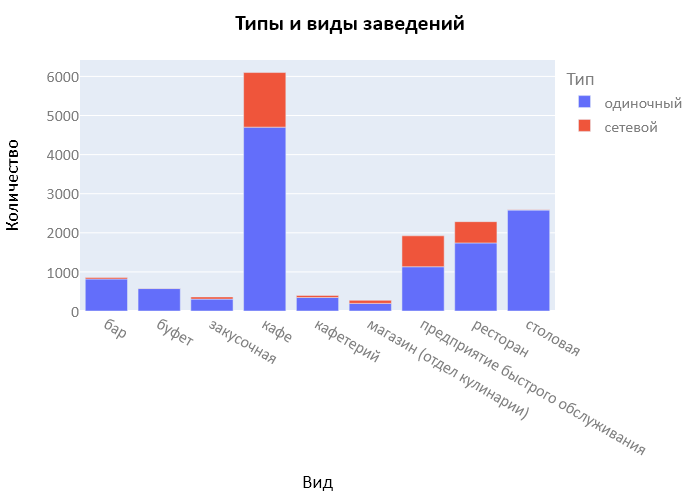

In [29]:
fig = draw_chart(data = data.groupby(['object_type', 'chain'], as_index=False).agg({'id':'nunique'}).\
           rename(columns={'id':'restaurants_cnt'})
           , kind='bar', data_x ='object_type', xlabel = 'Вид',  data_y='restaurants_cnt', color = 'chain'
           , color_name = 'Тип', ylabel = 'Количество', title = 'Типы и виды заведений')
fig.show('png')

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b>Вывод</b><br>
<li>к сетевым заведениям в основном отсятся кафе, фастфуды и рестораны</li>
<li>реже кулинарии, кафетерии, закусочные и бары</li>    
<li>не бывают сетевыми столовые и буфеты (т.к. скорее всего относятся к определённым организациям: школам, заводам, театрам)</li>
</div>

### Посадочные места в сетевых
* много заведений на мало мест VS мало заведений на много мест

In [30]:
data.query('chain =="сетевой"').groupby('object_name', as_index=False).agg({'id':'nunique', 'number':'mean'}).\
                rename(columns={'id':'restaurants_cnt', 'number':'seats_mean'}).\
                sort_values(by='restaurants_cnt', ascending=False).reset_index(drop=True).\
                agg({'restaurants_cnt':'mean','seats_mean':'mean'}).\
                rename(index={'restaurants_cnt':'restaurants_cnt_mean', 'seats_mean':'seats_mean_mean'})

restaurants_cnt_mean     5.653333
seats_mean_mean         59.381169
dtype: float64

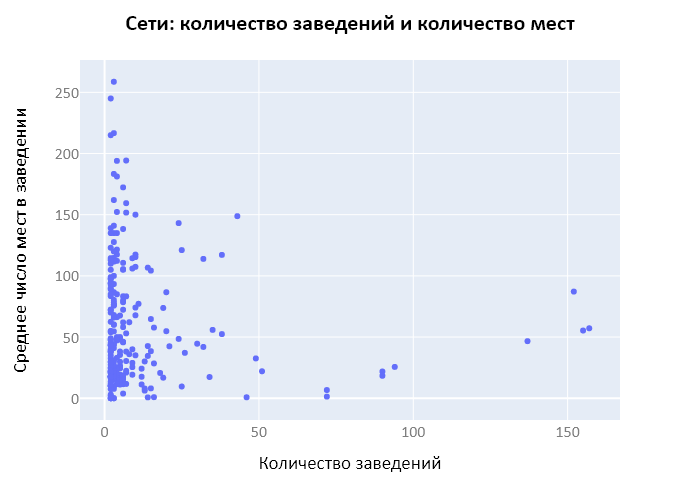

In [31]:
fig = draw_chart(data=\
           data.query('chain =="сетевой"').groupby('object_name', as_index=False).agg({'id':'nunique', 'number':'mean'}).\
                rename(columns={'id':'restaurants_cnt', 'number':'seats_mean'}).\
                sort_values(by='restaurants_cnt', ascending=False).reset_index(drop=True).query('restaurants_cnt >1')
           , kind='scatter', data_x ='restaurants_cnt', xlabel = 'Количество заведений',  data_y='seats_mean'
           , ylabel = 'Среднее число мест в заведении', title = 'Сети: количество заведений и количество мест')
fig.show('png')

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b>Вывод</b><br>
<li>с ростом количества заведений (примерно от 20) среднее число мест в заведении стремится к 50</li>
<li>видимо, с расширением сети становится сложнее поддерживать крупные заведения</li>
<li>маленькие сети состоят как из вместительных, так и из небольших заведений: разброс среднего числа мест довольно большой</li>    
</div>

### Посадочные места по видам
* среднее количество посадочных мест по видам
* вид с самым большим средним количеством посадочных мест

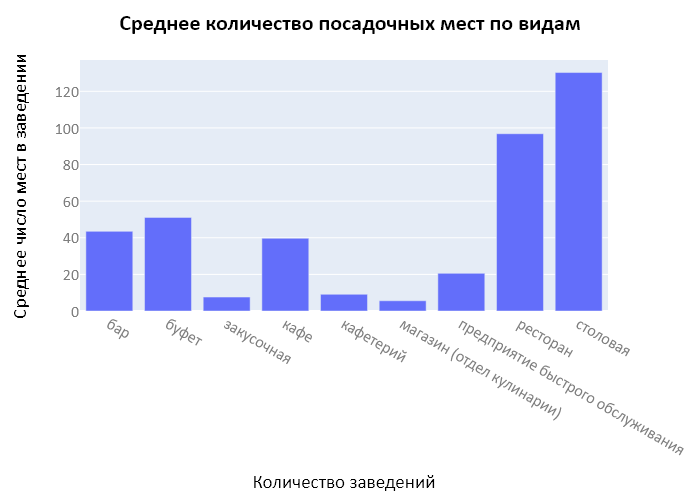

In [32]:
fig = draw_chart(data=data.groupby('object_type', as_index=False).agg({'number':'mean'}).rename(columns={'number':'seats_mean'})
           , kind='bar', data_x ='object_type', xlabel = 'Количество заведений',  data_y='seats_mean'
           , ylabel = 'Среднее число мест в заведении', title = 'Cреднее количество посадочных мест по видам')
fig.show('png')

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b>Вывод</b><br>
<li>самые вместительные заведения — столовые (больше 120 мест)</li>
<li>далее идут рестораны (около 90 мест)</li>
<li>ну а меньше всего мест — в кулинариях, кафетериях и закусочных</li>    
</div>

### Топ-10 улиц по количеству общепитов
* соотнесение улиц и районов
* районы — из внешнего файла

In [33]:
streets_top = data.groupby('street_name', as_index=False).agg({'id':'nunique','number':'mean'}).\
              rename(columns={'id':'restaurants_cnt', 'number':'seats_mean'}).sort_values(by='restaurants_cnt'
                                                                        , ascending=False).reset_index(drop=True).head(10)

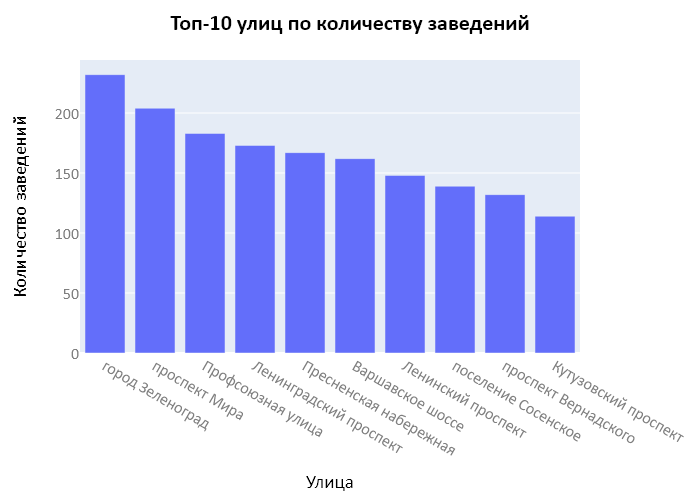

In [34]:
fig = draw_chart(data=streets_top, kind='bar', data_x ='street_name', xlabel = 'Улица',  data_y='restaurants_cnt'
           , ylabel = 'Количество заведений', title = 'Топ-10 улиц по количеству заведений')
fig.show('png')

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b>Вывод</b><br>
<li>в топ-10 по количеству заведений попали протяжённые улицы — в т.ч. 5 проспектов, шоссе и набережная</li>
<li>а также территории новой Москвы — Зеленоград и Сосенское, эти территории можно считать районами</li>
<li>можно отметить, что шаг в топе небольшой, да и разброс тоже</li>
</div>

In [35]:
streets_top_districts = streets_top.merge(streets_districts[['street_name', 'district_name']], on='street_name', how='left')
streets_top_districts['district_name'] = streets_top_districts['district_name'].fillna(streets_top_districts['street_name'])

In [36]:
streets_top_districts =\
                pd.DataFrame(streets_top_districts.groupby(['street_name', 'restaurants_cnt'])['district_name'].apply(list).\
                reset_index().sort_values(by='restaurants_cnt', ascending=False)).reset_index(drop=True)
streets_top_districts['districts_cnt'] = streets_top_districts['district_name'].apply(lambda x: len(x))

In [37]:
streets_top_districts

,street_name,restaurants_cnt,district_name,districts_cnt
0,город Зеленоград,232,[город Зеленоград],1
1,проспект Мира,204,"[Мещанский район, Алексеевский район, район Марьина Роща, Останкинский район, район Ростокино, район Свиблово, Ярославский район]",7
2,Профсоюзная улица,183,"[Академический район, район Коньково, Обручевский район, район Тёплый Стан, район Черёмушки, район Ясенево]",6
3,Ленинградский проспект,173,"[район Аэропорт, район Беговой, район Сокол, Хорошёвский район]",4
4,Пресненская набережная,167,[Пресненский район],1
5,Варшавское шоссе,162,"[Донской район, район Нагатино-Садовники, Нагорный район, район Чертаново Северное, район Чертаново Центральное, район Чертаново Южное, район Северное Бутово, район Южное Бутово, поселение Щербинка]",9
6,Ленинский проспект,148,"[район Якиманка, Донской район, Гагаринский район, Ломоносовский район, Обручевский район, район Тёплый Стан, район Проспект Вернадского, район Тропарёво-Никулино]",8
7,поселение Сосенское,139,[поселение Сосенское],1
8,проспект Вернадского,132,"[Гагаринский район, Ломоносовский район, район Проспект Вернадского, район Раменки, район Тропарёво-Никулино]",5
9,Кутузовский проспект,114,"[район Дорогомилово, район Фили-Давыдково]",2


### Улицы с 1 общепитом
* общее количество
* районы — из внешнего файла

In [38]:
streets_1 = data.groupby('street_name', as_index=False).agg({'id':'nunique'}).rename(columns={'id':'restaurants_cnt'}).\
                                    query('restaurants_cnt ==1')

In [39]:
# Число улиц c 1 заведением
len(streets_1)

541

In [40]:
streets_1_districts = streets_1.merge(streets_districts[['street_name', 'district_name']], on='street_name', how='left')
streets_1_districts = pd.DataFrame(streets_1_districts.groupby('district_name')['street_name'].apply(list).reset_index())
streets_1_districts['streets_cnt'] = streets_1_districts['street_name'].apply(lambda x: len(x))                            

In [41]:
# Число районов, где есть улицы с 1 заведением
len(streets_1_districts)

121

In [42]:
streets_1_districts = streets_1_districts[['district_name', 'streets_cnt']].sort_values(by='streets_cnt', ascending=False).\
                                                                                        reset_index(drop=True).head(10)

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b>Вывод</b><br>
<li>в Москве 541 улица с 1 общепитом</li>
<li>в 121 районе</li>
<li>в топе-3 по количеству улиц с 1 заведением: Таганский, Хамовники и Басманный</li>
<li>а на пятом месте — Пресненский район, куда входит Пресненская улица из топа-10 самых загруженных улиц</li>
</div>

### Посадочные места улицах c большим количеством заведений
* распределение количества мест
* закономерности

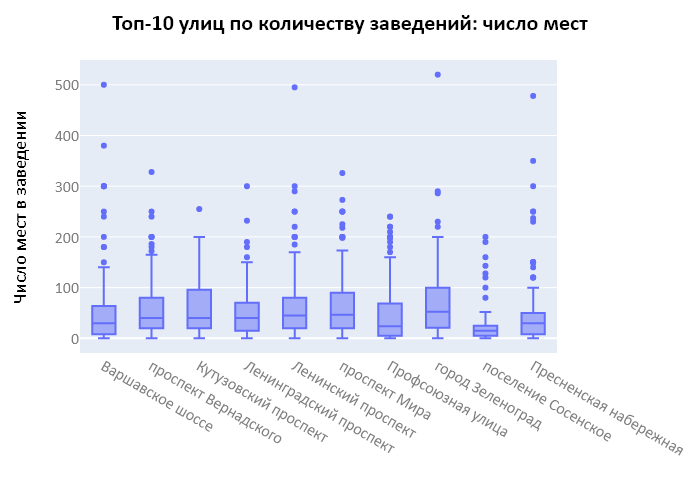

In [43]:
fig = draw_chart(data[data['street_name'].isin(streets_top['street_name'])].query('number <=600')
           , kind='box', data_x ='street_name', xlabel = '',  data_y='number'
           , ylabel = 'Число мест в заведении', title = 'Топ-10 улиц по количеству заведений: число мест')
fig.show('png')

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b>Вывод</b><br>
<li>на улицах с большим количеством общепитов в половине заведений около 40 мест </li>
<li>а в самых крупных заведениях 150-200 мест</li>
</div>

## Общий вывод

* **перспективный вид заведения**: кафе — самый популярный в Москве
* **выгодный район расположения**: Пресненский район, Пресненская набережная — в топе-10 по количеству заведений, но не первая, а сам район в топе-5 по количеству улиц с 1 заведением, жители которых могут ходить на набережную
* **оптимальное количество посадочных мест**: 40 — среднее по городу для кафе и для заведений на улицах из топа-10, а также сетевых заведений
* **возможности развития**: открытие до 20 новых точек также на 40 мест в том же районе на улицах с 1 заведением

[Презентация](https://drive.google.com/file/d/100xrp1OE3EwpXLWWOflUrYPcBjyWb0EO/view?usp=sharing)

In [44]:
# Выгрузка в Excel
with pd.ExcelWriter(dt.datetime.strftime(dt.datetime.now(),'%Y%m%d_%H-%M') +'_Общепиты.xlsx') as wr:
    streets_top.to_excel(wr, sheet_name = 'streets', index = False)
    streets_1_districts.to_excel(wr, sheet_name = 'districts', index = False)

___